In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## Data Directories:

In [2]:
#--------Movie Lens Data directories-----------
MLens = "../Data/ml-latest-small/movies.csv"
MLensLinks = "../Data/ml-latest-small/links.csv"
MLensRatings = "../Data/ml-latest-small/ratings.csv"
MLensTags = "../Data/ml-latest-small/tags.csv"
#--------imdb Data directories-----------------
IMDB = "../Data/iMDB/IMDb movies.csv"
IMDBName = "../Data/iMDB/IMDb names.csv"
IMDBRatings = "../Data/iMDB/IMDb ratings.csv"
IMDBPrincipals = "../Data/iMDB/IMDb title_principals.csv"

# EDA:

## MovieLens Data:

In [3]:
movieLensdf = pd.read_csv(MLens)
linksdf = pd.read_csv(MLensLinks)
mLensRatingsdf = pd.read_csv(MLensRatings)
mLensTagsdf = pd.read_csv(MLensTags)

In [4]:
movieLensdf.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
movieLensdf.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [6]:
linksdf.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [7]:
linksdf = linksdf.drop("tmdbId",axis=1)

In [8]:
linksdf.dtypes

movieId    int64
imdbId     int64
dtype: object

In [9]:
linksdf.head()

movieId  imdbId
0        1  114709
1        2  113497
2        3  113228
3        4  114885
4        5  113041

In [10]:
mLensRatingsdf.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [11]:
mLensRatingsdf.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [12]:
mLensTagsdf.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [13]:
mLensTagsdf.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

## IMDb Data:

In [14]:
imdbdf = pd.read_csv(IMDB,low_memory = False)
imdbNamesdf = pd.read_csv(IMDBName,low_memory = False)
imdbRatingsdf = pd.read_csv(IMDBRatings,low_memory = False)
imdbPrincipalsdf = pd.read_csv(IMDBPrincipals,low_memory = False)

### IMDb movies:

In [15]:
imdbdf.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [16]:
imdbdf.head()

imdb_title_id                        title               original_title  \
0     tt0000009                   Miss Jerry                   Miss Jerry   
1     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
2     tt0001892               Den sorte drøm               Den sorte drøm   
3     tt0002101                    Cleopatra                    Cleopatra   
4     tt0002130                    L'Inferno                    L'Inferno   

   year date_published                      genre  duration           country  \
0  1894     1894-10-09                    Romance        45               USA   
1  1906     1906-12-26    Biography, Crime, Drama        70         Australia   
2  1911     1911-08-19                      Drama        53  Germany, Denmark   
3  1912     1912-11-13             Drama, History       100               USA   
4  1911     1911-03-06  Adventure, Drama, Fantasy        68             Italy   

  language                             director  ...  \
0     None                      Alexander Black  ...   
1     None                         Charles Tait  ...   
2      NaN                            Urban Gad  ...   
3  English                   Charles L. Gaskill  ...   
4  Italian  Francesco Bertolini, Adolfo Padovan  ...   

                                              actors  \
0  Blanche Bayliss, William Courtenay, Chauncey D...   
1  Elizabeth Tait, John Tait, Norman Campbell, Be...   
2  Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3  Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4  Salvatore Papa, Arturo Pirovano, Giuseppe de L...   

                                         description avg_vote votes   budget  \
0  The adventures of a female reporter in the 1890s.      5.9   154      NaN   
1  True story of notorious Australian outlaw Ned ...      6.1   589   $ 2250   
2  Two men of high rank are both wooing the beaut...      5.8   188      NaN   
3  The fabled queen of Egypt's affair with Roman ...      5.2   446  $ 45000   
4  Loosely adapted from Dante's Divine Comedy and...      7.0  2237      NaN   

   usa_gross_income worlwide_gross_income metascore reviews_from_users  \
0               NaN                   NaN       NaN                1.0   
1               NaN                   NaN       NaN                7.0   
2               NaN                   NaN       NaN                5.0   
3               NaN                   NaN       NaN               25.0   
4               NaN                   NaN       NaN               31.0   

   reviews_from_critics  
0                   2.0  
1                   7.0  
2                   2.0  
3                   3.0  
4                  14.0  

[5 rows x 22 columns]

In [17]:
imdbdf.count()

imdb_title_id            85855
title                    85855
original_title           85855
year                     85855
date_published           85855
genre                    85855
duration                 85855
country                  85791
language                 85022
director                 85768
writer                   84283
production_company       81400
actors                   85786
description              83740
avg_vote                 85855
votes                    85855
budget                   23710
usa_gross_income         15326
worlwide_gross_income    31016
metascore                13305
reviews_from_users       78258
reviews_from_critics     74058
dtype: int64

**Null values:**

In [18]:
imdbdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

**Depending on the visualization in question, we will need to decide what to do with the null values.**

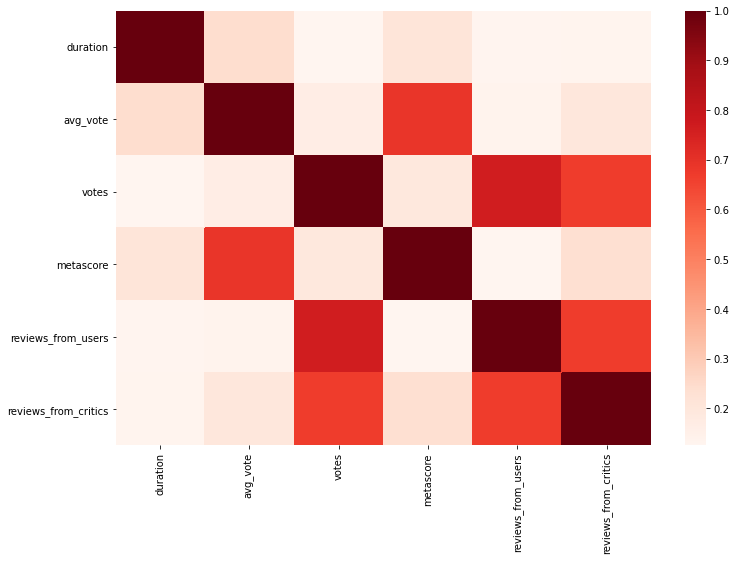

In [19]:
corr=imdbdf.corr()
fig, ax =plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=False   )
plt.show()

### IMDb names:

In [20]:
imdbNamesdf.head()

imdb_name_id             name               birth_name  height  \
0    nm0000001     Fred Astaire  Frederic Austerlitz Jr.   177.0   
1    nm0000002    Lauren Bacall        Betty Joan Perske   174.0   
2    nm0000003  Brigitte Bardot          Brigitte Bardot   166.0   
3    nm0000004     John Belushi        John Adam Belushi   170.0   
4    nm0000005   Ingmar Bergman     Ernst Ingmar Bergman   179.0   

                                                 bio  \
0  Fred Astaire was born in Omaha, Nebraska, to J...   
1  Lauren Bacall was born Betty Joan Perske on Se...   
2  Brigitte Bardot was born on September 28, 1934...   
3  John Belushi was born in Chicago, Illinois, US...   
4  Ernst Ingmar Bergman was born July 14, 1918, t...   

                                       birth_details date_of_birth  \
0               May 10, 1899 in Omaha, Nebraska, USA    1899-05-10   
1  September 16, 1924 in The Bronx, New York City...    1924-09-16   
2                September 28, 1934 in Paris, France    1934-09-28   
3         January 24, 1949 in Chicago, Illinois, USA    1949-01-24   
4      July 14, 1918 in Uppsala, Uppsala län, Sweden    1918-07-14   

                            place_of_birth  \
0                     Omaha, Nebraska, USA   
1  The Bronx, New York City, New York, USA   
2                            Paris, France   
3                   Chicago, Illinois, USA   
4             Uppsala, Uppsala län, Sweden   

                                       death_details date_of_death  \
0  June 22, 1987 in Los Angeles, California, USA ...    1987-06-22   
1  August 12, 2014 in New York City, New York, US...    2014-08-12   
2                                                NaN           NaN   
3  March 5, 1982 in Hollywood, Los Angeles, Calif...    1982-03-05   
4  July 30, 2007 in Fårö, Gotlands län, Sweden  (...    2007-07-30   

                              place_of_death  \
0             Los Angeles, California, USA     
1             New York City, New York, USA     
2                                        NaN   
3  Hollywood, Los Angeles, California, USA     
4               Fårö, Gotlands län, Sweden     

                         reason_of_death  \
0                              pneumonia   
1                                 stroke   
2                                    NaN   
3  acute cocaine and heroin intoxication   
4                         natural causes   

                                      spouses_string  spouses  divorces  \
0  Robyn Smith  (27 June 1980 - 22 June 1987) (hi...        2         0   
1  Jason Robards  (4 July 1961 - 10 September 196...        2         1   
2  Bernard d'Ormale  (16 August 1992 - present)\n...        4         3   
3  Judith Belushi-Pisano  (31 December 1976 - 5 M...        1         0   
4  Ingrid Bergman  (11 November 1971 - 20 May 199...        5         4   

   spouses_with_children  children  
0                      1         2  
1                      2         3  
2                      1         1  
3                      0         0  
4                      5         8

In [21]:
imdbNamesdf.dtypes

imdb_name_id              object
name                      object
birth_name                object
height                   float64
bio                       object
birth_details             object
date_of_birth             object
place_of_birth            object
death_details             object
date_of_death             object
place_of_death            object
reason_of_death           object
spouses_string            object
spouses                    int64
divorces                   int64
spouses_with_children      int64
children                   int64
dtype: object

**Null values:**

**Null values:**

In [22]:
imdbNamesdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_name_id                  0
name                          0
birth_name                    0
height                   253024
bio                       93007
birth_details            187093
date_of_birth            187093
place_of_birth           193713
death_details            257772
date_of_death            257772
place_of_death           260667
reason_of_death          275011
spouses_string           252353
spouses                       0
divorces                      0
spouses_with_children         0
children                      0
dtype: int64

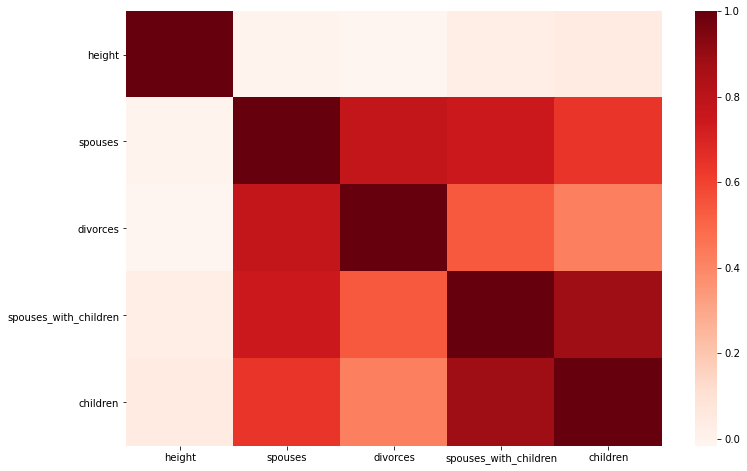

In [23]:
corr=imdbNamesdf.corr()
fig, ax =plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=False   )
plt.savefig("../Figures/imdbNames.png")
plt.show()

### IMDb Ratings:

In [24]:
imdbRatingsdf.head()

imdb_title_id  weighted_average_vote  total_votes  mean_vote  median_vote  \
0     tt0000009                    5.9          154        5.9          6.0   
1     tt0000574                    6.1          589        6.3          6.0   
2     tt0001892                    5.8          188        6.0          6.0   
3     tt0002101                    5.2          446        5.3          5.0   
4     tt0002130                    7.0         2237        6.9          7.0   

   votes_10  votes_9  votes_8  votes_7  votes_6  ...  females_30age_avg_vote  \
0        12        4       10       43       28  ...                     5.7   
1        57       18       58      137      139  ...                     6.2   
2         6        6       17       44       52  ...                     5.8   
3        15        8       16       62       98  ...                     5.5   
4       210      225      436      641      344  ...                     7.3   

   females_30age_votes  females_45age_avg_vote  females_45age_votes  \
0                 13.0                     4.5                  4.0   
1                 23.0                     6.6                 14.0   
2                  4.0                     6.8                  7.0   
3                 14.0                     6.1                 21.0   
4                 82.0                     7.4                 77.0   

   top1000_voters_rating  top1000_voters_votes  us_voters_rating  \
0                    5.7                  34.0               6.4   
1                    6.4                  66.0               6.0   
2                    5.4                  32.0               6.2   
3                    4.9                  57.0               5.5   
4                    6.9                 139.0               7.0   

   us_voters_votes  non_us_voters_rating  non_us_voters_votes  
0             51.0                   6.0                 70.0  
1             96.0                   6.2                331.0  
2             31.0                   5.9                123.0  
3            207.0                   4.7                105.0  
4            488.0                   7.0               1166.0  

[5 rows x 49 columns]

In [25]:
imdbRatingsdf.dtypes

imdb_title_id                 object
weighted_average_vote        float64
total_votes                    int64
mean_vote                    float64
median_vote                  float64
votes_10                       int64
votes_9                        int64
votes_8                        int64
votes_7                        int64
votes_6                        int64
votes_5                        int64
votes_4                        int64
votes_3                        int64
votes_2                        int64
votes_1                        int64
allgenders_0age_avg_vote     float64
allgenders_0age_votes        float64
allgenders_18age_avg_vote    float64
allgenders_18age_votes       float64
allgenders_30age_avg_vote    float64
allgenders_30age_votes       float64
allgenders_45age_avg_vote    float64
allgenders_45age_votes       float64
males_allages_avg_vote       float64
males_allages_votes          float64
males_0age_avg_vote          float64
males_0age_votes             float64
m

**Null values:**

In [26]:
imdbRatingsdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_title_id                    0
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8                          0
votes_7                          0
votes_6                          0
votes_5                          0
votes_4                          0
votes_3                          0
votes_2                          0
votes_1                          0
allgenders_0age_avg_vote     52496
allgenders_0age_votes        52496
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_0age_avg_vote          58444
males_0age_votes             58444
males_18age_avg_vote          1465
males_18age_votes   

In [27]:
votes_columns = np.array([ "votes_{}".format(i) for i in (range(1,11))])
imdbRatingsdf[votes_columns].head()

votes_1  votes_2  votes_3  votes_4  votes_5  votes_6  votes_7  votes_8  \
0       14        5        1        9       28       28       43       10   
1       16       13       20       28      103      139      137       58   
2        4        6        5       16       32       52       44       17   
3       16       25       26       63      117       98       62       16   
4       87       20       39       66      169      344      641      436   

   votes_9  votes_10  
0        4        12  
1       18        57  
2        6         6  
3        8        15  
4      225       210

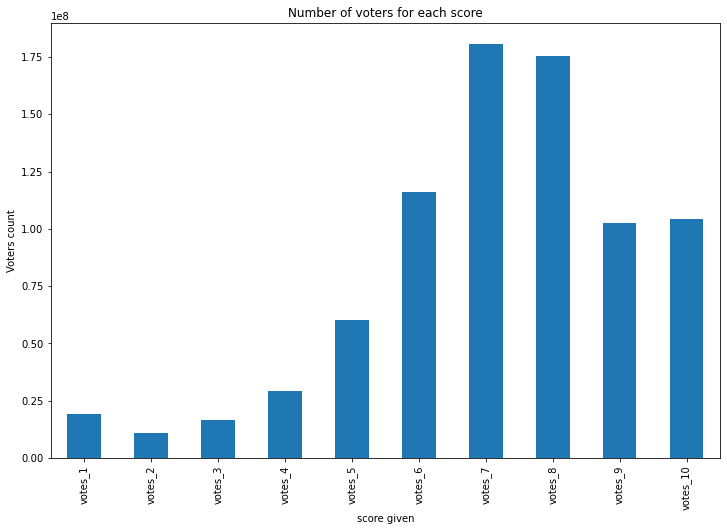

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
imdbRatingsdf[votes_columns].sum().plot.bar(ax)
ax.set_ylabel("Voters count")
ax.set_xlabel("score given")
ax.set_title("Number of voters for each score")
plt.savefig("../Figures/scoresDistribution.png")
plt.show()

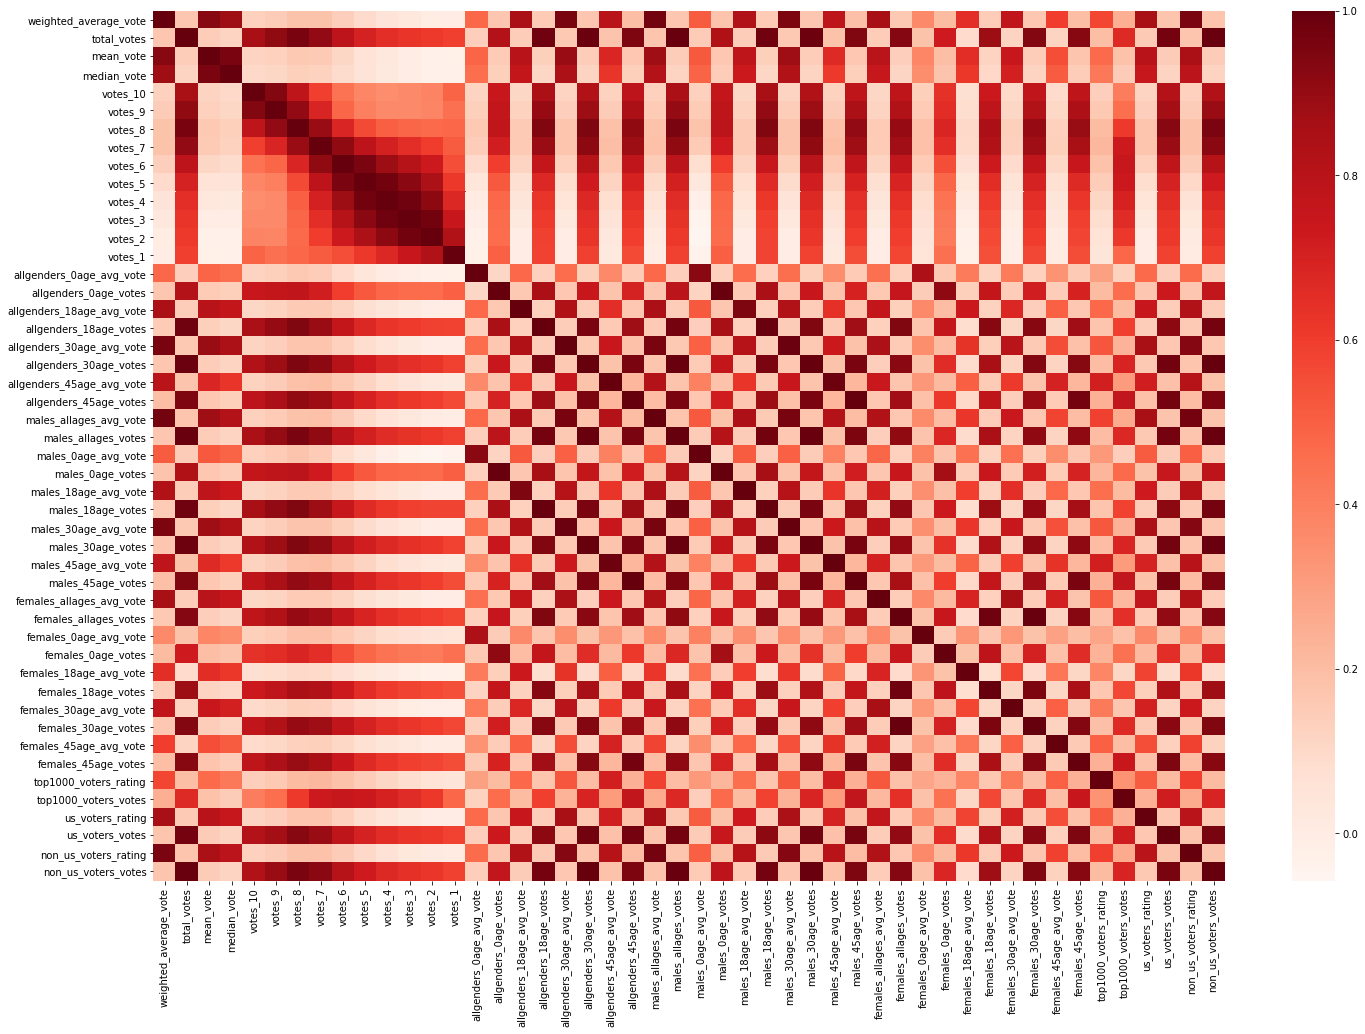

In [29]:
corr=imdbRatingsdf.corr()
fig, ax =plt.subplots(figsize=(24,16))
sns.heatmap(corr, cmap="Reds",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=False   )
plt.show()

### IMDb Principals:

In [30]:
imdbPrincipalsdf.head(10)

imdb_title_id  ordering imdb_name_id  category       job  \
0     tt0000009         1    nm0063086   actress       NaN   
1     tt0000009         2    nm0183823     actor       NaN   
2     tt0000009         3    nm1309758     actor       NaN   
3     tt0000009         4    nm0085156  director       NaN   
4     tt0000574         1    nm0846887   actress       NaN   
5     tt0000574         2    nm0846894     actor       NaN   
6     tt0000574         3    nm3002376     actor       NaN   
7     tt0000574         4    nm0170118   actress       NaN   
8     tt0000574         5    nm0846879  director       NaN   
9     tt0000574         6    nm0317210  producer  producer   

                                          characters  
0           ["Miss Geraldine Holbrook (Miss Jerry)"]  
1                                   ["Mr. Hamilton"]  
2  ["Chauncey Depew - the Director of the New Yor...  
3                                                NaN  
4                                     ["Kate Kelly"]  
5                                  ["School Master"]  
6                                     ["Steve Hart"]  
7                                                NaN  
8                                                NaN  
9                                                NaN

In [31]:
imdbPrincipalsdf.dtypes

imdb_title_id    object
ordering          int64
imdb_name_id     object
category         object
job              object
characters       object
dtype: object

**Null values:**

In [32]:
imdbPrincipalsdf.apply(lambda x: sum(x.isna()),axis=0)

imdb_title_id         0
ordering              0
imdb_name_id          0
category              0
job              622782
characters       494677
dtype: int64

# Merging it together:

In [33]:
mLensRatingsdf.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [34]:
imdbRatingsdf.head()

imdb_title_id  weighted_average_vote  total_votes  mean_vote  median_vote  \
0     tt0000009                    5.9          154        5.9          6.0   
1     tt0000574                    6.1          589        6.3          6.0   
2     tt0001892                    5.8          188        6.0          6.0   
3     tt0002101                    5.2          446        5.3          5.0   
4     tt0002130                    7.0         2237        6.9          7.0   

   votes_10  votes_9  votes_8  votes_7  votes_6  ...  females_30age_avg_vote  \
0        12        4       10       43       28  ...                     5.7   
1        57       18       58      137      139  ...                     6.2   
2         6        6       17       44       52  ...                     5.8   
3        15        8       16       62       98  ...                     5.5   
4       210      225      436      641      344  ...                     7.3   

   females_30age_votes  females_45age_avg_vote  females_45age_votes  \
0                 13.0                     4.5                  4.0   
1                 23.0                     6.6                 14.0   
2                  4.0                     6.8                  7.0   
3                 14.0                     6.1                 21.0   
4                 82.0                     7.4                 77.0   

   top1000_voters_rating  top1000_voters_votes  us_voters_rating  \
0                    5.7                  34.0               6.4   
1                    6.4                  66.0               6.0   
2                    5.4                  32.0               6.2   
3                    4.9                  57.0               5.5   
4                    6.9                 139.0               7.0   

   us_voters_votes  non_us_voters_rating  non_us_voters_votes  
0             51.0                   6.0                 70.0  
1             96.0                   6.2                331.0  
2             31.0                   5.9                123.0  
3            207.0                   4.7                105.0  
4            488.0                   7.0               1166.0  

[5 rows x 49 columns]

In [35]:
linksdf.head()

movieId  imdbId
0        1  114709
1        2  113497
2        3  113228
3        4  114885
4        5  113041

In [36]:
linksdf['imdbId'] = linksdf["imdbId"].apply(lambda x: "tt{:07d}".format(x))
linksdf.head()

movieId     imdbId
0        1  tt0114709
1        2  tt0113497
2        3  tt0113228
3        4  tt0114885
4        5  tt0113041

In [37]:
mergedmovies = linksdf.merge(imdbRatingsdf, left_on="imdbId", right_on="imdb_title_id")

In [38]:
mergedmovies

movieId     imdbId imdb_title_id  weighted_average_vote  total_votes  \
0           1  tt0114709     tt0114709                    8.3       864461   
1           2  tt0113497     tt0113497                    7.0       299083   
2           3  tt0113228     tt0113228                    6.7        23742   
3           4  tt0114885     tt0114885                    5.9         9353   
4           5  tt0113041     tt0113041                    6.1        33587   
...       ...        ...           ...                    ...          ...   
8557   193571  tt3110014     tt3110014                    6.7          286   
8558   193573  tt3837248     tt3837248                    7.2          455   
8559   193581  tt5476944     tt5476944                    7.7          847   
8560   193583  tt5914996     tt5914996                    7.5         2504   
8561   193587  tt8391976     tt8391976                    7.2          521   

      mean_vote  median_vote  votes_10  votes_9  votes_8  ...  \
0           8.3          8.0    177024   214560   273073  ...   
1           7.1          7.0     24313    22327    63008  ...   
2           6.8          7.0      2270     1389     3441  ...   
3           6.2          6.0      1205      442      989  ...   
4           6.2          6.0      2371     1370     3186  ...   
...         ...          ...       ...      ...      ...  ...   
8557        6.8          7.0        28       19       50  ...   
8558        7.7          8.0       172       31       72  ...   
8559        8.1          8.0       291      110      179  ...   
8560        7.9          8.0       699      375      553  ...   
8561        7.5          8.0       109       45      113  ...   

      females_30age_avg_vote  females_30age_votes  females_45age_avg_vote  \
0                        8.2              59102.0                     8.3   
1                        7.2              25960.0                     7.2   
2                        6.9               1778.0                     6.9   
3                        6.5               1784.0                     6.6   
4                        6.4               5191.0                     6.3   
...                      ...                  ...                     ...   
8557                     6.8                 33.0                     8.3   
8558                     7.7                 10.0                     4.0   
8559                     8.0                 50.0                     8.1   
8560                     7.1                 33.0                     5.8   
8561                     7.8                 33.0                     7.3   

      females_45age_votes  top1000_voters_rating  top1000_voters_votes  \
0                 12842.0                    8.1                 839.0   
1                  4219.0                    6.8                 792.0   
2                   880.0                    6.2                 373.0   
3                   970.0                    5.2                 214.0   
4                  1188.0                    5.5                 382.0   
...                   ...                    ...                   ...   
8557                  3.0                    8.0                   6.0   
8558                  4.0                    6.4                  18.0   
8559                 13.0                    6.2                  16.0   
8560                 13.0                    5.5                  28.0   
8561                  3.0                    6.4                  10.0   

      us_voters_rating  us_voters_votes  non_us_voters_rating  \
0                  8.6         147914.0                   8.2   
1                  7.0          49740.0                   6.9   
2                  6.7           8332.0                   6.6   
3                  6.2           3824.0                   5.3   
4                  6.1           9446.0                   5.9   
...                ...              ...                   ...   
8557               

In [39]:
mergedDF = mLensRatingsdf.merge(mergedmovies, left_on="movieId", right_on="movieId")

In [40]:
mergedDF.head()

userId  movieId  rating   timestamp     imdbId imdb_title_id  \
0       1        1     4.0   964982703  tt0114709     tt0114709   
1       5        1     4.0   847434962  tt0114709     tt0114709   
2       7        1     4.5  1106635946  tt0114709     tt0114709   
3      15        1     2.5  1510577970  tt0114709     tt0114709   
4      17        1     4.5  1305696483  tt0114709     tt0114709   

   weighted_average_vote  total_votes  mean_vote  median_vote  ...  \
0                    8.3       864461        8.3          8.0  ...   
1                    8.3       864461        8.3          8.0  ...   
2                    8.3       864461        8.3          8.0  ...   
3                    8.3       864461        8.3          8.0  ...   
4                    8.3       864461        8.3          8.0  ...   

   females_30age_avg_vote  females_30age_votes  females_45age_avg_vote  \
0                     8.2              59102.0                     8.3   
1                     8.2              59102.0                     8.3   
2                     8.2              59102.0                     8.3   
3                     8.2              59102.0                     8.3   
4                     8.2              59102.0                     8.3   

   females_45age_votes  top1000_voters_rating  top1000_voters_votes  \
0              12842.0                    8.1                 839.0   
1              12842.0                    8.1                 839.0   
2              12842.0                    8.1                 839.0   
3              12842.0                    8.1                 839.0   
4              12842.0                    8.1                 839.0   

   us_voters_rating  us_voters_votes  non_us_voters_rating  \
0               8.6         147914.0                   8.2   
1               8.6         147914.0                   8.2   
2               8.6         147914.0                   8.2   
3               8.6         147914.0                   8.2   
4               8.6         147914.0                   8.2   

   non_us_voters_votes  
0             338585.0  
1             338585.0  
2             338585.0  
3             338585.0  
4             338585.0  

[5 rows x 54 columns]

In [41]:
mergedDF.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'imdb_title_id',
       'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
       'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5',
       'votes_4', 'votes_3', 'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes',
       'females_allages_avg_vote', 'females_allages_votes',
       'females_0age_avg_vote', 'females_0age_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
       'f

# Filtering the data needed:

# Working on the IMDb data only:


In [42]:
imdbdf_clean = imdbdf[['title','year', 'genre', 'duration', 'country', 'director', 'writer', 'production_company', 'actors', 'avg_vote']] #keep the wanted column

In [43]:
imdbdf_clean

title  year                      genre  \
0                          Miss Jerry  1894                    Romance   
1         The Story of the Kelly Gang  1906    Biography, Crime, Drama   
2                      Den sorte drøm  1911                      Drama   
3                           Cleopatra  1912             Drama, History   
4                           L'Inferno  1911  Adventure, Drama, Fantasy   
...                               ...   ...                        ...   
85850                         Le lion  2020                     Comedy   
85851  De Beentjes van Sint-Hildegard  2020              Comedy, Drama   
85852       Padmavyuhathile Abhimanyu  2019                      Drama   
85853               Sokagin Çocuklari  2019              Drama, Family   
85854      La vida sense la Sara Amat  2019                      Drama   

       duration           country                             director  \
0            45               USA                      Alexander Black   
1            70         Australia                         Charles Tait   
2            53  Germany, Denmark                            Urban Gad   
3           100               USA                   Charles L. Gaskill   
4            68             Italy  Francesco Bertolini, Adolfo Padovan   
...         ...               ...                                  ...   
85850        95   France, Belgium               Ludovic Colbeau-Justin   
85851       103       Netherlands                      Johan Nijenhuis   
85852       130             India                      Vineesh Aaradya   
85853        98            Turkey                    Ahmet Faik Akinci   
85854        74             Spain                            Laura Jou   

                                      writer             production_company  \
0                            Alexander Black     Alexander Black Photoplays   
1                               Charles Tait                 J. and N. Tait   
2      Urban Gad, Gebhard Schätzler-Perasini                       Fotorama   
3                           Victorien Sardou  Helen Gardner Picture Players   
4                            Dante Alighieri                    Milano Film   
...                                      ...                            ...   
85850  Alexandre Coquelle, Matthieu Le Naour              Monkey Pack Films   
85851           Radek Bajgar, Herman Finkers           Johan Nijenhuis & Co   
85852       Vineesh Aaradya, Vineesh Aaradya               RMCC Productions   
85853         Ahmet Faik Akinci, Kasim Uçkan                    Gizem Ajans   
85854                   Coral Cruz, Pep Puig  La Xarxa de Comunicació Local   

                                                  actors  avg_vote  
0      Blanche Bayliss, William Courtenay, Chauncey D...       5.9  
1      Elizabeth Tait, John Tait, Norman Campbell, Be...       6.1  
2      Asta Nielsen, Valdemar Psilander, Gunnar Helse...       5.8  
3      Helen Gardner, Pearl Sindelar, Miss Fielding, ...       5.2  
4      Salvatore Papa, Arturo Pirovano, Giuseppe de L...       7.0  
...                                                  ...       ...  
85850  Dany Boon, Philippe Katerine, Anne Serra, Samu...       5.3  
85851  Herman Finkers, Johanna ter Steege, Leonie ter...       7.7  
85852  Anoop Chandran, Indrans, Sona Nair, Simon Brit...       7.9  
85853  Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...       6.4  
85854  Maria Morera Colomer, Biel Rossell Pelfort, Is...       6.7  

[85855 rows x 10 columns]

Remove the row where the value for column 'year' is 'TV Movie 2019'

In [44]:
#imdbdf_clean[imdbdf_clean["year"] == 'TV Movie 2019']["year"].apply(lambda x: x[-4:])
imdbdf_clean = imdbdf_clean[imdbdf_clean.year != 'TV Movie 2019']
imdbdf_clean['year'] = imdbdf_clean['year'].astype('int')

In [45]:
imdbdf_clean.isna().sum() #find all the NaN values

title                    0
year                     0
genre                    0
duration                 0
country                 64
director                87
writer                1572
production_company    4455
actors                  69
avg_vote                 0
dtype: int64

In [46]:
imdbdf_clean = imdbdf_clean.dropna() #drop all the rows with NaN values
imdbdf_clean.isna().sum()

title                 0
year                  0
genre                 0
duration              0
country               0
director              0
writer                0
production_company    0
actors                0
avg_vote              0
dtype: int64

Separate the countries so we can analyze them separately.
This piece of code will be used later on (in the section "top countries creating movies").

In [47]:
countries = {} #create empty dictionary
list_countries = list(imdbdf_clean['country']) #set up a list of countries
for i in list_countries:
    i = list(i.split(',')) #split countries separated by commas
    if len(i) == 1: #if 1 country in countries.keys()
        if i in list(countries.keys()): #countries.keys() is the country name, countries.values() is the count of country name
            countries[i] +=1 #count
        else:
            countries[i[0]] = 0
    else:
        for j in i: #does the same but for len(i) != 1
            if j in list(countries.keys()):
                countries[j] += 1 #count
            else:
                countries[j] =1

Separate the genre so we can analyze them separately
This piece of code will be used later on.

In [48]:
genre = list(imdbdf_clean['genre'])
genre_list = [] #create an empty list

for i in genre:
    i = list(i.split(',')) #split words when comma
    for j in i:
        genre_list.append(j.replace(' ', '')) #replace extra space
        
genre_counter = Counter(genre_list) #We'll need it after

In [49]:
imdbdf_clean.describe()

year      duration      avg_vote
count  80161.000000  80161.000000  80161.000000
mean    1992.965644    100.016342      5.913369
std       24.551436     22.023683      1.216666
min     1894.000000     41.000000      1.000000
25%     1977.000000     88.000000      5.300000
50%     2002.000000     96.000000      6.100000
75%     2013.000000    108.000000      6.800000
max     2020.000000    808.000000      9.800000

**Distribution per year:**

In [50]:
#groupby year and count how many title we have each year
title = imdbdf_clean.groupby('year').agg({'title': ['count']})
title.columns = ['Title Count']
title = title.sort_values('Title Count', ascending = False)
title.head(5)

Title Count
year             
2017         3010
2018         2957
2016         2895
2015         2742
2014         2675

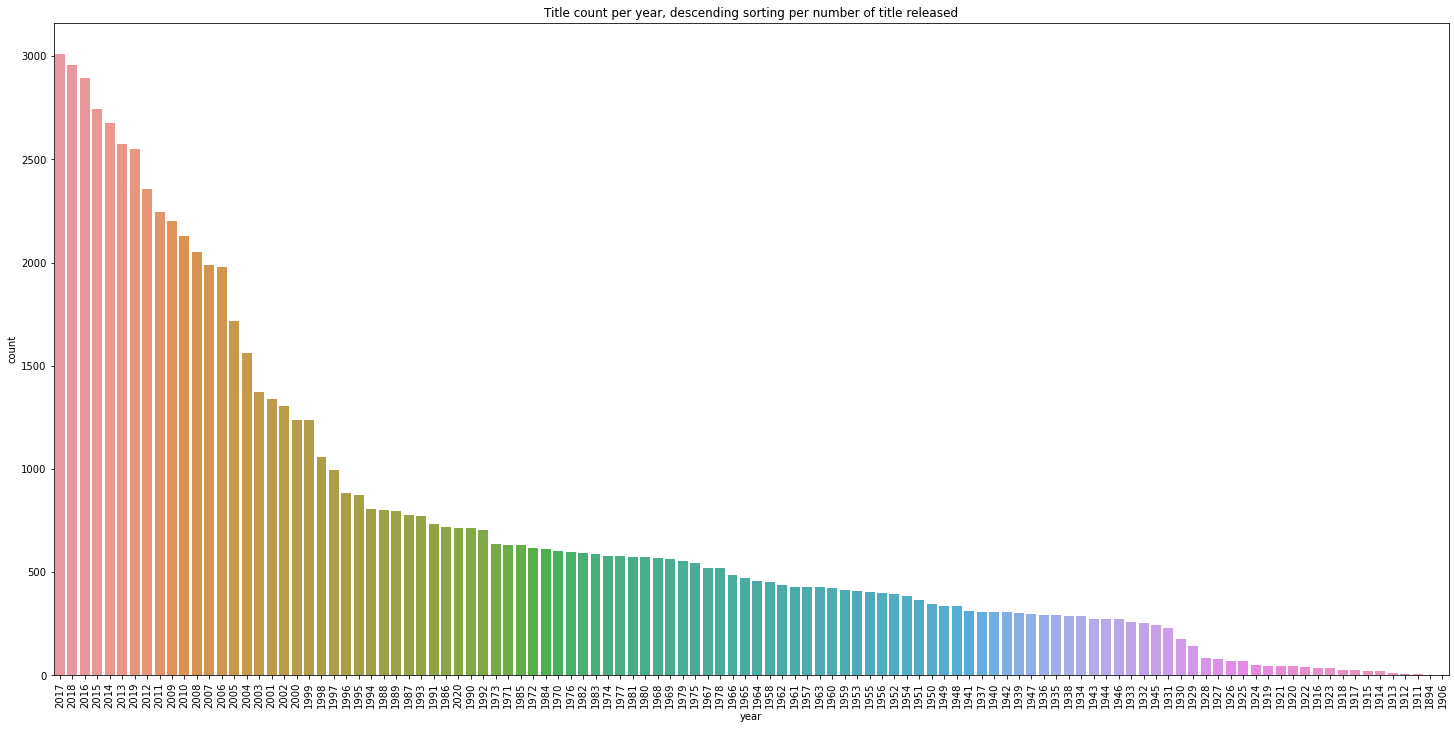

In [51]:
#visualize with a bar graph in descending title count order 
fig_dim = (25,12)
fig, ax = plt.subplots(figsize = fig_dim)
sns.countplot(x = 'year', data = imdbdf_clean, order = imdbdf_clean['year'].value_counts().index)
plt.title('Title count per year, descending sorting per number of title released')
plt.xticks(rotation=90)
plt.show()

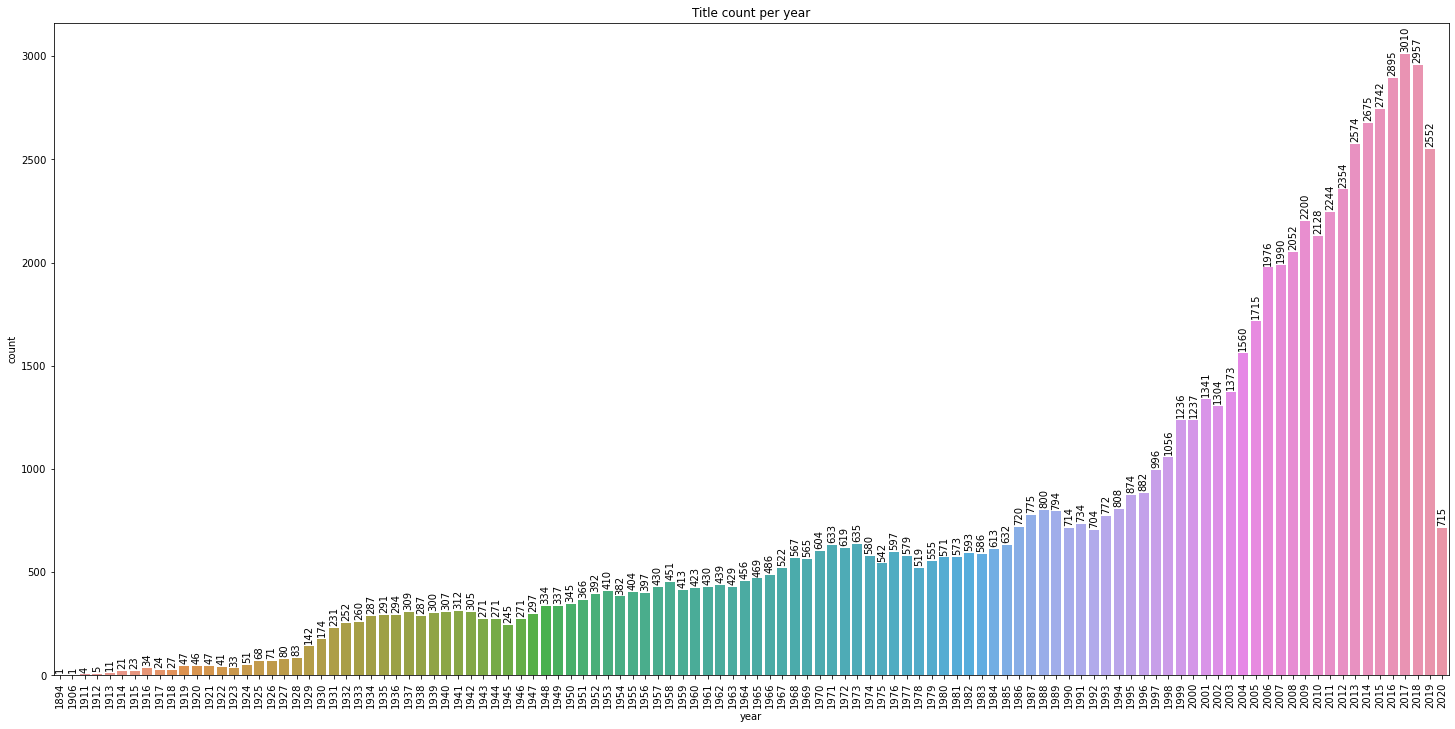

In [52]:
#visualize with a plot graph in ascending year order
fig_dim = (25,12)
fig, ax = plt.subplots(figsize = fig_dim)
ax = sns.countplot(x = 'year', data = imdbdf_clean)
plt.title('Title count per year')

#display the count on the bar graph
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height() + 20), rotation=90)
    
plt.xticks(rotation=90)
plt.show()

Get the growth year to year (in %):

In [53]:
title

Title Count
year             
2017         3010
2018         2957
2016         2895
2015         2742
2014         2675
...           ...
1913           11
1912            5
1911            4
1906            1
1894            1

[112 rows x 1 columns]

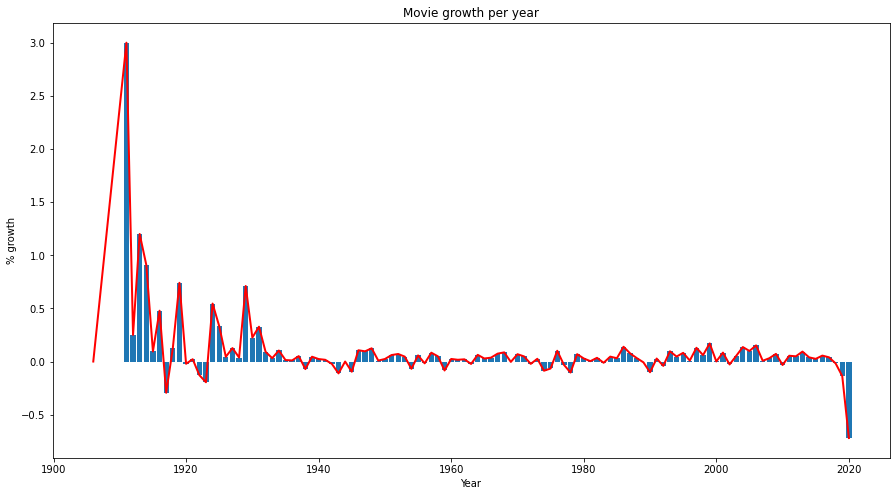

In [54]:
title = title.sort_index() #sort by year. The year is the index
growth = title.pct_change() #calculate the %growth year by year
growth.columns = ['% growth']
plt.figure(figsize = (15, 8))
x = growth['% growth']
y = growth.index
plt.bar(y, x)
plt.plot(y, x, color = 'red', linewidth = 2.0)
plt.title('Movie growth per year')
plt.xlabel('Year')
plt.ylabel('% growth')
plt.show()

**Get the top rated movies:**

Top 10 rated movie with the year and the country

All time best movies:

In [55]:
imdbdf_clean = imdbdf_clean.sort_values(by = 'avg_vote', ascending = False)
rating = imdbdf_clean[0:10] #get the 1st 10 values
fig = px.sunburst(rating, path = ['year', 'country', 'title'], values = 'avg_vote', color = 'avg_vote')
fig.show()

Let's consider the best movies of this century:

In [56]:
rating = imdbdf_clean[imdbdf_clean.year > 1999][0:10] #get the 1st 10 values
fig = px.sunburst(rating, path = ['year', 'country', 'title'], values = 'avg_vote', color = 'avg_vote')
fig.show()

Let's see which year was the best year for movies production:

In [57]:
best = imdbdf_clean.groupby('year').agg({'avg_vote': ['mean']})
best.columns = ['Average rating']
best = best.sort_values('Average rating', ascending = False)
best.head()

Average rating
year                
1923        6.812121
1924        6.790196
1928        6.778313
1926        6.698592
1921        6.697872

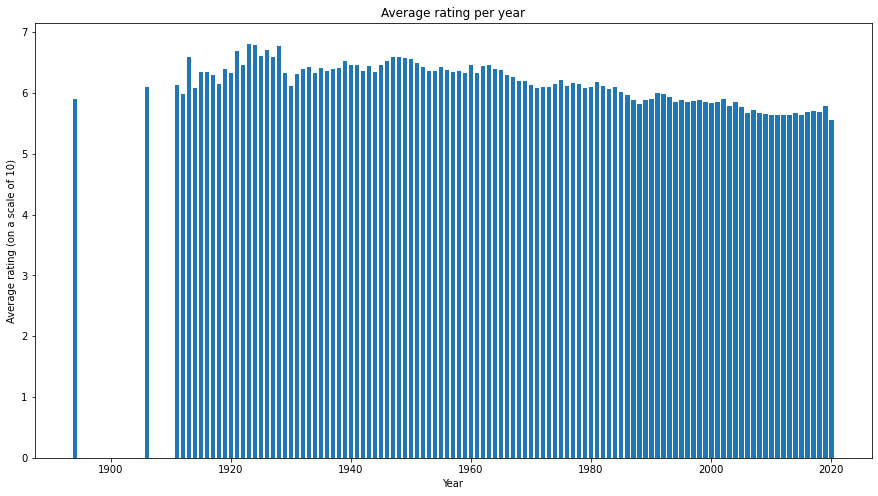

In [58]:
plt.figure(figsize = (15, 8))
x = best['Average rating'].round(decimals = 3)
y = best.index
plt.bar(y, x)
plt.title('Average rating per year')
plt.xlabel('Year')
plt.ylabel('Average rating (on a scale of 10)')
plt.show()

In [59]:
best = best[best.index >=2000]

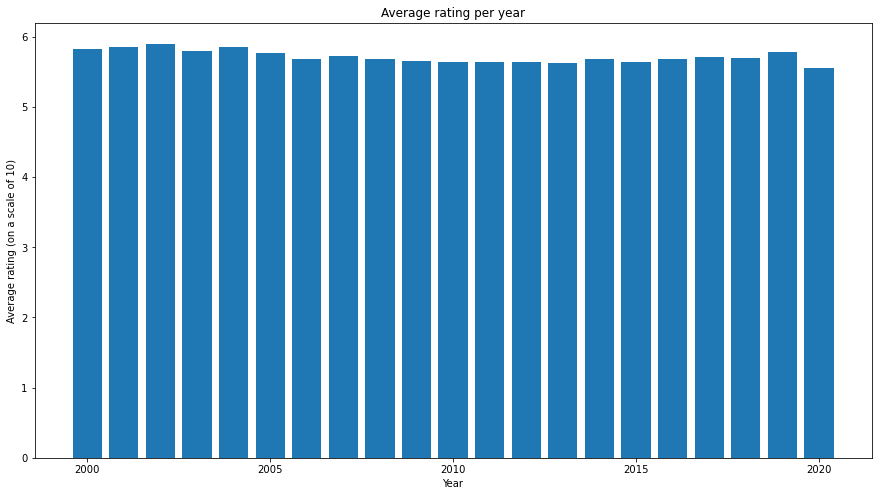

In [60]:
plt.figure(figsize = (15, 8))
x = best['Average rating'].round(decimals = 3)
y = best.index
plt.bar(y, x)
plt.title('Average rating per year')
plt.xlabel('Year')
plt.ylabel('Average rating (on a scale of 10)')
plt.show()

Top countries creating movies:

In [61]:
countries_fin = {} #create an empty dictionary
for country, no in countries.items(): 
    country = country.replace(' ', '') #remove the extra space create by the split(',')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no

#sort the country according to their count
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item: item[1], reverse= True)}

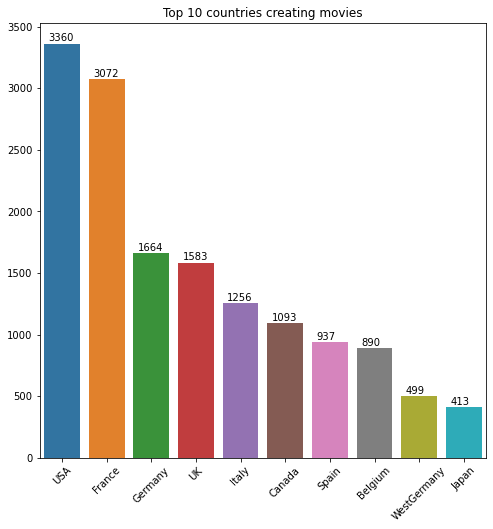

In [62]:
plt.figure(figsize = (8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10])
plt.title('Top 10 countries creating movies')
plt.xticks(rotation=45)
#display the count on the bar graph
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 20))
    
plt.show()

Let's see how each country conributes in the volume of all movies produced:

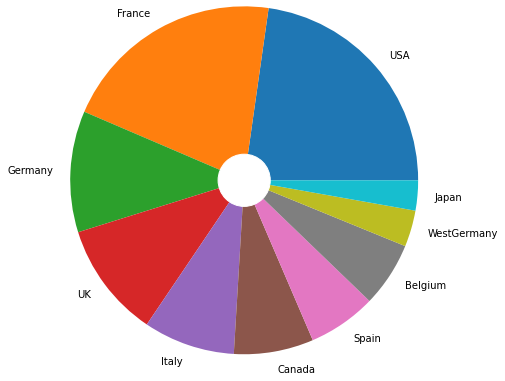

In [63]:
#create the dataframe
df_countries = pd.DataFrame(list(countries_fin.items()), columns = ['Country', 'Country count'])

#plot a pie chart of the distribution of each country per region
fig,ax = plt.subplots()
x = df_countries['Country count'][:10] #get the top 10 countries
labels = df_countries['Country'][:10] #get the top 10 countries
ax.pie(x, labels = labels, radius = 2)

#create a white circle at the center of the pie to create a donut chart
my_circle = plt.Circle( (0,0), 0.3, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

**Genre:**

In [64]:
genres = {k: v for k, v in sorted(genre_counter.items(), key=lambda item: item[1], reverse= True)}
genres

{'Drama': 44166,
 'Comedy': 27475,
 'Romance': 13233,
 'Action': 12084,
 'Thriller': 10706,
 'Crime': 10541,
 'Horror': 8896,
 'Adventure': 7302,
 'Mystery': 4933,
 'Family': 3723,
 'Fantasy': 3585,
 'Sci-Fi': 3411,
 'Biography': 2314,
 'History': 2190,
 'War': 2132,
 'Animation': 1994,
 'Musical': 1907,
 'Music': 1620,
 'Western': 1556,
 'Sport': 1025,
 'Film-Noir': 661,
 'Reality-TV': 2,
 'Documentary': 1,
 'News': 1}

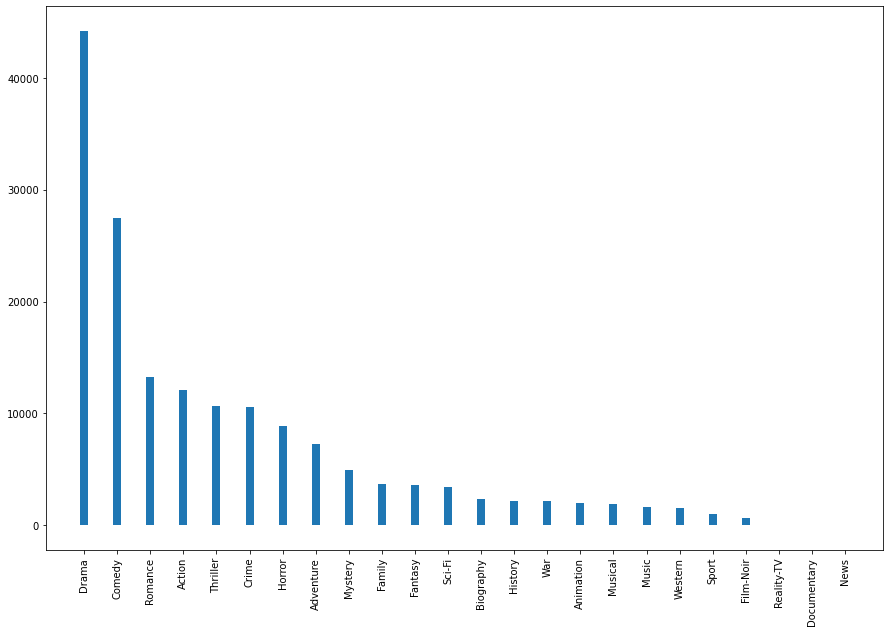

In [65]:
fig_dim = (15,10)
fig, ax = plt.subplots(figsize = fig_dim)
x = list(genres.keys())
y = list(genres.values())
ax.vlines(x, ymin = 0, ymax = y, linewidth = 8)
plt.xticks(rotation = 90)
plt.show()

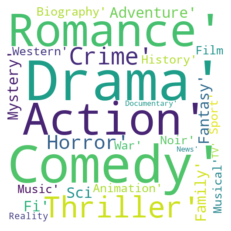

In [66]:
#create list of genre (unique genre)
text = list(genres.keys())

#create the wordcloud object
wordcloud = WordCloud(width = 500, height = 500, max_words = 100000, background_color = 'white').generate(str(text))

#Display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

Exploring Plotly:

In [67]:
config = {'responsive': False}
genres_df = pd.DataFrame({"Genre":genres.keys(),"number_of_movies":genres.values()})

genres_bar = px.bar(genres_df[:10], 
                    x = 'Genre', 
                    y = 'number_of_movies', 
                    title = 'Top 10 Genres in terms of number of movies',
                    text = 'number_of_movies', 
                    labels = dict(genre = 'Genre', number_of_movies = 'Number of movies'),
                    color = 'Genre')
                    
genres_bar.show()

In [68]:
years_df = imdbdf_clean[['year','title', 'genre']].groupby(['year','genre']).count().reset_index().rename(columns={'title':'number_of_movies'})
years_df = years_df.sort_values(by=['number_of_movies'], ascending=False)
years_df = years_df[years_df['year'] >= 2000]#Movies of this century 
years_df = years_df[years_df['number_of_movies'] >= 100]#years where the number of movies is over 100

In [69]:
detailed_genres_bar = px.bar(years_df, 
                             x ='year', 
                             y = 'number_of_movies', 
                             color = 'genre', 
                             title='Movies produced in the 21st century classified by genres', 
                             text = 'number_of_movies',
                             labels = dict(year = 'Year', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()

**Producction Companies:**

In [70]:
production_companies_df = imdbdf_clean[['production_company','title']].groupby(['production_company']).count().reset_index().rename(columns={'title':'number_of_movies'})
production_companies_df = production_companies_df.sort_values(by='number_of_movies', ascending=False)
production_companies_df = production_companies_df.iloc[:10]
production_companies_df

production_company  number_of_movies
20624              Metro-Goldwyn-Mayer (MGM)              1283
30637                           Warner Bros.              1152
8179                       Columbia Pictures               913
23166                     Paramount Pictures               903
29674                  Twentieth Century Fox               864
29942                     Universal Pictures               732
24630                     RKO Radio Pictures               535
21216                                Mosfilm               278
29938  Universal International Pictures (UI)               272
6402                                  Canal+               231

In [71]:
detailed_genres_bar = px.bar(production_companies_df, 
                             x ='production_company', 
                             y = 'number_of_movies', 
                             color = 'production_company', 
                             title='Top 10 production companies', 
                             text = 'number_of_movies',
                             labels = dict(production_company = 'Production Company', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()

If we choose only this century:

In [72]:
production_companies_df = imdbdf_clean[imdbdf_clean.year > 1999][['production_company','title']].groupby(['production_company']).count().reset_index().rename(columns={'title':'number_of_movies'})
production_companies_df = production_companies_df.sort_values(by='number_of_movies', ascending=False)
production_companies_df = production_companies_df.iloc[:10]
detailed_genres_bar = px.bar(production_companies_df, 
                             x ='production_company', 
                             y = 'number_of_movies', 
                             color = 'production_company', 
                             title='Top 10 production companies', 
                             text = 'number_of_movies',
                             labels = dict(production_company = 'Production Company', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()